In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore", category=UserWarning) # to ignore annoying warning messages when using matplotlib

import networkx as nx
import numpy as np

In [2]:
def make_ER(n, p):
    g = nx.Graph()
    for i in range(n):
        g.add_node(i)
    
    for i in range(n - 1):
        for j in range(i, n):
            if random.random() <= p:
                g.add_edge(i, j)
    #plot it against the system size which is the number of nodes 
    #size of largest component should become the same as system size as p increases
    
    
    return g

In [3]:
def size_largest_component(g):
    #now i am going to try and find the giant component
    #giant = max(nx.connected_component_subgraphs(g), key=len)
    #a set of the nodes in the largest component
    size_list = max(nx.connected_components(g), key=len)
    #the size of the largest component!!
    size = len(size_list)
    #return size of largest component
    return size

size_largest_component(make_ER(10, 0.25))

8

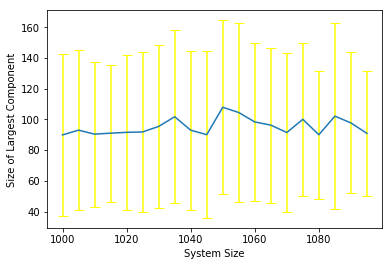

In [4]:
system_size = []
n=1000
averg = []
std = []

#p == pc
def make_n_vary(num, n):
    for i in range(20):
        pc = 1/n
        size_large_component = []
        for j in range(num):
            g = make_ER(n, pc)
            size_large_component.append(size_largest_component(g))
        c = np.array(size_large_component)
        mean, stdev = np.mean(c), np.std(c, ddof=0)
        averg.append(mean)
        std.append(stdev)
        system_size.append(n)
        n += 5

make_n_vary(100, n)

# errorbar(x, y, e, linestyle='None', marker='^')
plt.errorbar(system_size, averg, std, ecolor = 'yellow', capsize = 5)
plt.xlabel('System Size')
plt.ylabel('Size of Largest Component')
plt.show()

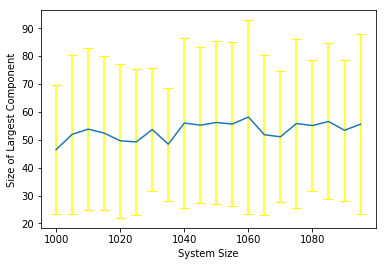

In [5]:
system_size = []
averg = []
std = []
n=1000
#p=.001

#below critical point
def make_n_vary(num, n):
    sumz = 0
    for i in range(20):
        pc = 1/n
        p = 0.9 * pc
        size_large_component = []
        for j in range(num):
            g = make_ER(n, p)
            size_large_component.append(size_largest_component(g))
        c = np.array(size_large_component)
        mean, stdev = np.mean(c), np.std(c, ddof=0)
        averg.append(mean)
        std.append(stdev)
        system_size.append(n)
        n += 5

make_n_vary(100, n)
        
plt.errorbar(system_size, averg, std, ecolor = 'yellow', capsize = 5)
plt.xlabel('System Size')
plt.ylabel('Size of Largest Component')
plt.show()

[176.22999999999999, 170.03, 147.19999999999999, 180.53999999999999, 169.40000000000001, 176.31999999999999, 178.65000000000001, 174.74000000000001, 174.15000000000001, 179.59, 171.09, 175.44, 179.06999999999999, 194.00999999999999, 179.74000000000001, 188.41999999999999, 166.49000000000001, 184.28, 171.75, 188.58000000000001]


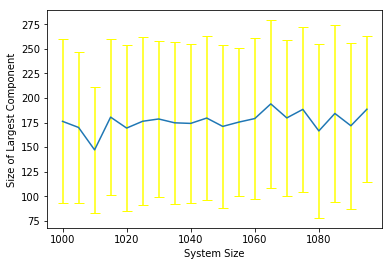

In [6]:
system_size = []
#size_large_component = []
averg = []
std = []
n=1000
#p=.001

#slightly above critical point
def make_n_vary(num, n):
    for i in range(20):
        pc = 1/n
        p = 1.1 * pc
        size_large_component = []
        for j in range(num):
            g = make_ER(n, p)
            size_large_component.append(size_largest_component(g))
        c = np.array(size_large_component)
        mean, stdev = np.mean(c), np.std(c, ddof=0)
        averg.append(mean)
        std.append(stdev)
        system_size.append(n)
        n += 5


make_n_vary(100, n)
print(averg) 

#c = np.array(size_large_component)
#mean, std = np.mean(c), np.std(c, ddof=0)
#print(std)

# errorbar(x, y, e, linestyle='None', marker='^')
plt.errorbar(system_size, averg, std, ecolor = 'yellow', capsize = 5)
plt.xlabel('System Size')
plt.ylabel('Size of Largest Component')
plt.show()

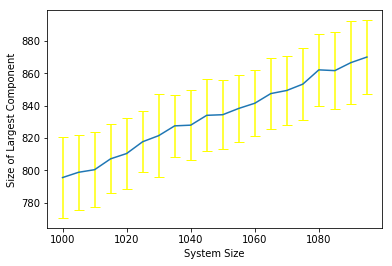

In [7]:
system_size = []
averg = []
std = []
n=1000
#p=.001

#way above critical point
def make_n_vary(num, n):
    for i in range(20):
        pc = 1/n
        p = 2 * pc
        size_large_component = []
        for j in range(num):
            g = make_ER(n, p)
            size_large_component.append(size_largest_component(g))
        c = np.array(size_large_component)
        mean, stdev = np.mean(c), np.std(c, ddof=0)
        averg.append(mean)
        std.append(stdev)
        system_size.append(n)
        n += 5

make_n_vary(100, n)
        
plt.errorbar(system_size, averg, std, ecolor = 'yellow', capsize = 5)
plt.xlabel('System Size')
plt.ylabel('Size of Largest Component')
plt.show()

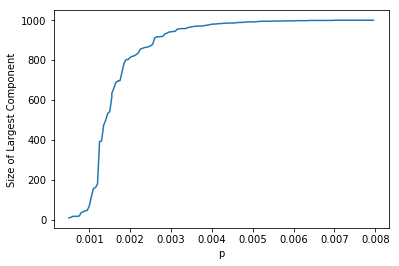

In [8]:
p_size = []
size_large_component = []
n=1000
p= 0.0005

# average k = n-1 * p

for i in range(150):
    g = make_ER(n, p)
    #while 0.001 <= p <= 0.002:
        #g1 = make_ER(n, p)
        #size_large_component.append(size_largest_component(g1))
        #p_size.append(p)
    size_large_component.append(size_largest_component(g))
    p_size.append(p)
    p += .00005

g1 = make_ER(1000, 0.0007)
size_large_component.append(size_largest_component(g1))
p_size.append(0.0007)

g2 = make_ER(1000, 0.0013)
size_large_component.append(size_largest_component(g2))
p_size.append(0.0013)

g3 = make_ER(1000, 0.0017)
size_large_component.append(size_largest_component(g3))
p_size.append(0.0017)

g4 = make_ER(1000, 0.00155)
size_large_component.append(size_largest_component(g4))
p_size.append(0.00155)

plt.plot(sorted(p_size), sorted(size_large_component))
plt.xlabel('p')
plt.ylabel('Size of Largest Component')
plt.show()

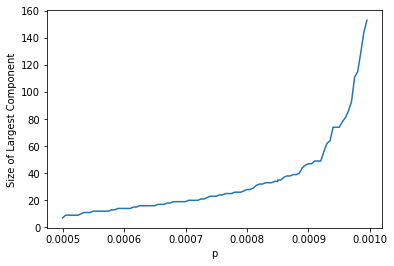

In [9]:
p_size = []
size_large_component = []
n=1000
p= 0.0005

# average k = n-1 * p

for i in range(100):
    g = make_ER(n, p)
    #while 0.001 <= p <= 0.002:
        #g1 = make_ER(n, p)
        #size_large_component.append(size_largest_component(g1))
        #p_size.append(p)
    size_large_component.append(size_largest_component(g))
    p_size.append(p)
    p += .000005

g1 = make_ER(1000, 0.00075)
size_large_component.append(size_largest_component(g1))
p_size.append(0.00075)

g2 = make_ER(1000, 0.00085)
size_large_component.append(size_largest_component(g2))
p_size.append(0.00085)

g3 = make_ER(1000, 0.00067)
size_large_component.append(size_largest_component(g3))
p_size.append(0.00067)

g4 = make_ER(1000, 0.00055)
size_large_component.append(size_largest_component(g4))
p_size.append(0.00055)

plt.plot(sorted(p_size), sorted(size_large_component))
plt.xlabel('p')
plt.ylabel('Size of Largest Component')
plt.show()

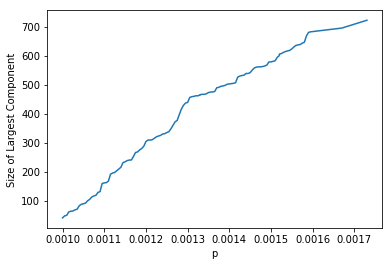

In [10]:
p_size = []
size_large_component = []
n=1000
p= 0.001

# average k = n-1 * p

for i in range(120):
    g = make_ER(n, p)
    #while 0.001 <= p <= 0.002:
        #g1 = make_ER(n, p)
        #size_large_component.append(size_largest_component(g1))
        #p_size.append(p)
    size_large_component.append(size_largest_component(g))
    p_size.append(p)
    p += .000005

g1 = make_ER(1000, 0.00173)
size_large_component.append(size_largest_component(g1))
p_size.append(0.00173)

g2 = make_ER(1000, 0.00152)
size_large_component.append(size_largest_component(g2))
p_size.append(0.00152)

g3 = make_ER(1000, 0.00167)
size_large_component.append(size_largest_component(g3))
p_size.append(0.00167)

g4 = make_ER(1000, 0.00133)
size_large_component.append(size_largest_component(g4))
p_size.append(0.00133)

plt.plot(sorted(p_size), sorted(size_large_component))
plt.xlabel('p')
plt.ylabel('Size of Largest Component')
plt.show()

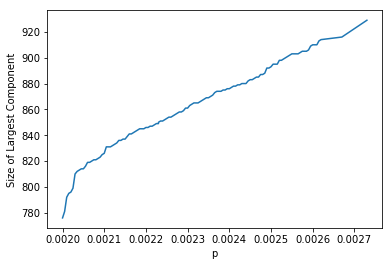

In [11]:
p_size = []
size_large_component = []
n=1000
p= 0.002

# average k = n-1 * p

for i in range(125):
    g = make_ER(n, p)
    #while 0.001 <= p <= 0.002:
        #g1 = make_ER(n, p)
        #size_large_component.append(size_largest_component(g1))
        #p_size.append(p)
    size_large_component.append(size_largest_component(g))
    p_size.append(p)
    p += .000005

g1 = make_ER(1000, 0.00273)
size_large_component.append(size_largest_component(g1))
p_size.append(0.00273)

g2 = make_ER(1000, 0.00252)
size_large_component.append(size_largest_component(g2))
p_size.append(0.00252)

g3 = make_ER(1000, 0.00267)
size_large_component.append(size_largest_component(g3))
p_size.append(0.00267)

g4 = make_ER(1000, 0.00223)
size_large_component.append(size_largest_component(g4))
p_size.append(0.00223)

plt.plot(sorted(p_size), sorted(size_large_component))
plt.xlabel('p')
plt.ylabel('Size of Largest Component')
plt.show()

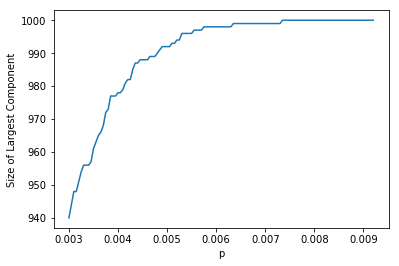

In [12]:
p_size = []
size_large_component = []
n=1000
p= 0.003

# average k = n-1 * p

for i in range(125):
    g = make_ER(n, p)
    #while 0.001 <= p <= 0.002:
        #g1 = make_ER(n, p)
        #size_large_component.append(size_largest_component(g1))
        #p_size.append(p)
    size_large_component.append(size_largest_component(g))
    p_size.append(p)
    p += .00005

plt.plot(sorted(p_size), sorted(size_large_component))
plt.xlabel('p')
plt.ylabel('Size of Largest Component')
plt.show()